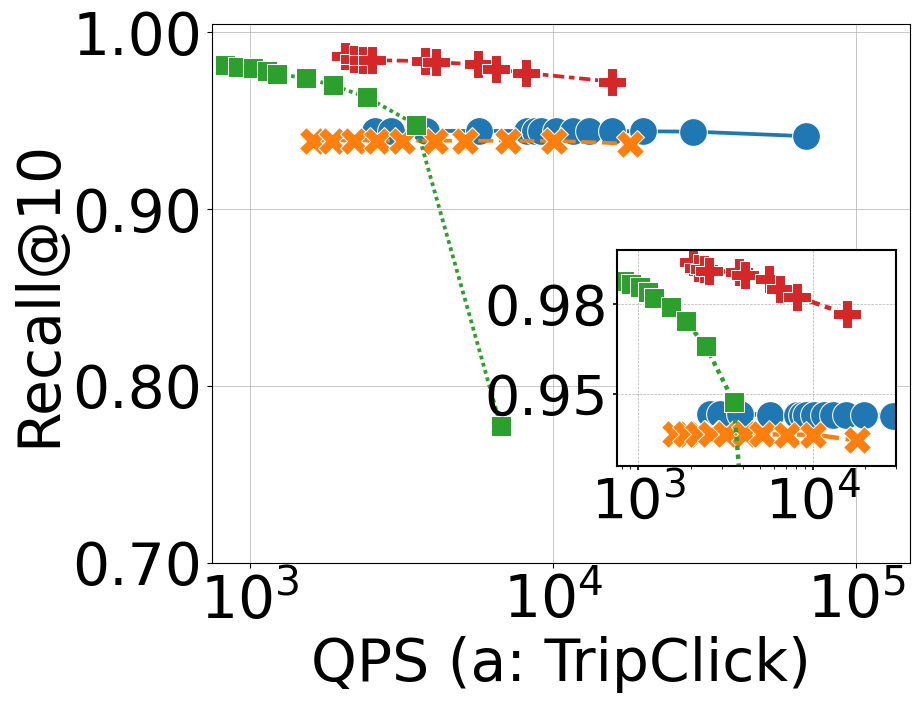

In [25]:
# Trip click Dedicated Plotting Script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "UNG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 1000, 2000, 3000, 4000],
        "Time": [68493.15, 28985.51, 19762.85, 15625, 13136.91, 11586.33, 10225.46, 9124.09, 8741.26, 8169.61, 5688.99, 3815.78, 2928.08, 2575.88, 2198.26],
        "Recall": [0.94122, 0.94384, 0.94401, 0.94405, 0.94408, 0.94413,  0.94415, 0.94416, 0.94417, 0.94418, 0.94419, 0.94421, 0.94421, 0.94421, 0.94421]
    },

    "TAG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [17921.15, 10070.0, 7121.37, 5119.34, 4089.57, 3166.62, 2616.75, 2209.39, 1870.6, 1615.92],
        "Recall": [0.9370, 0.9386, 0.9386, 0.9387, 0.9387, 0.9387, 0.9388, 0.9388, 0.9388, 0.9388]
    },
   
    "ACORN-\u03B3":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [6711.41, 3521.13, 2433.09, 1876.17, 1531.39, 1228.5, 1135.07, 1025.64, 909.918, 824.402],
        "Recall": [0.7773, 0.9478, 0.9632, 0.9701, 0.9740, 0.9765, 0.9784, 0.9797, 0.9804, 0.9814]
    },
    "Query-aware ":   {
         "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [15675, 8155, 6463, 5635, 4109, 3792, 2533, 2366, 2197, 2053],
        "Recall": [0.9721, 0.977, 0.979, 0.982, 0.983, 0.9838, 0.9842, 0.9846, 0.9850, 0.9865]
    }
}


df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(9,7))


LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LEGEND_FONTSIZE = 24
LINE_WIDTH = 2.7
MARKER_SIZE = 20


sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (a: TripClick)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.70, 1.005)
ax.set_xlim(750, 15e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
# axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

axins = inset_axes(ax, width="40%", height="40%", 
                   bbox_to_anchor=(0.58, 0.18, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)
                   

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.93,0.99)
axins.set_xlim(750, 3e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
# 
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/TripClickDedicated.pdf", format="pdf", bbox_inches="tight")

plt.show()




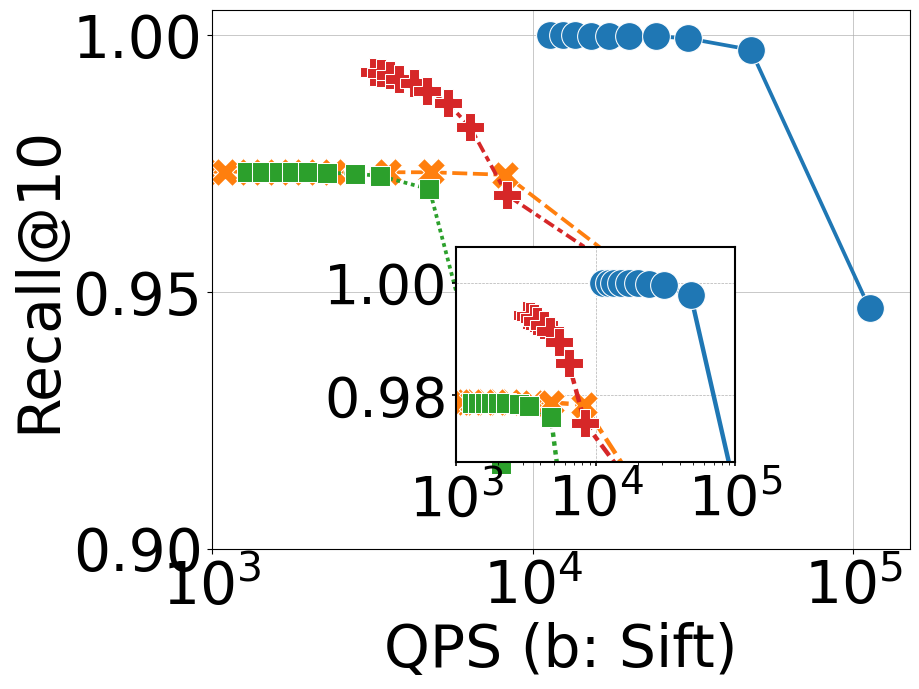

In [26]:
# Dedicated Solution For SIFT
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "UNG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 1000, 2000, 3000, 4000],
        "Time": [112359.55, 47846.41, 30581.35, 24213.08, 20000, 17301.04, 15197.57, 13513.51, 12387.46, 11299.44],
        "Recall": [0.94676, 0.99716, 0.99936, 0.9998, 0.9999, 0.99992, 0.99993, 0.99996, 0.99997, 0.99998]
    },

    "TAG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [23753.44, 8200.16, 4796.18, 3546.10, 2375.89, 1950.90, 1599.74, 1308.07, 1099.32, 947.52],
        "Recall": [0.9507, 0.9728, 0.9733, 0.9733, 0.9734, 0.9734, 0.9734, 0.9734, 0.9734, 0.9734]
    },


     
    "ACORN-\u03B3":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [ 7968.13, 4759.64, 3330, 2792.52, 2273.76, 1985.7, 1778.09, 1612.64, 1425.92, 1284.52],
        "Recall": [ 0.9165, 0.9700, 0.9726, 0.9730, 0.9732, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733]
    },
     "Query-aware ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [20921, 8328, 6378, 5435, 4661, 4252, 3811, 3574, 3350, 3188],
        "Recall": [0.9521, 0.9688, 0.9821, 0.9867, 0.9892, 0.9906, 0.9915, 0.9922, 0.9926, 0.9929]
    }
}
df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(9,7))


LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LEGEND_FONTSIZE = 24
LINE_WIDTH = 2.7
MARKER_SIZE = 20


sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (b: Sift)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.90, 1.005)
ax.set_xlim(1000, 15e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
# axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

axins = inset_axes(ax, width="40%", height="40%", 
                   bbox_to_anchor=(0.35, 0.16, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)
                   

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.96,1.008)
axins.set_xlim(1000, 10e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
# 
# plt.savefig("/data3/Adeel/Query-AwareResult/YT-Video-Like-Range.pdf", format="pdf", bbox_inches="tight")
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/SIFTDedicated.pdf", format="pdf", bbox_inches="tight")
plt.show()




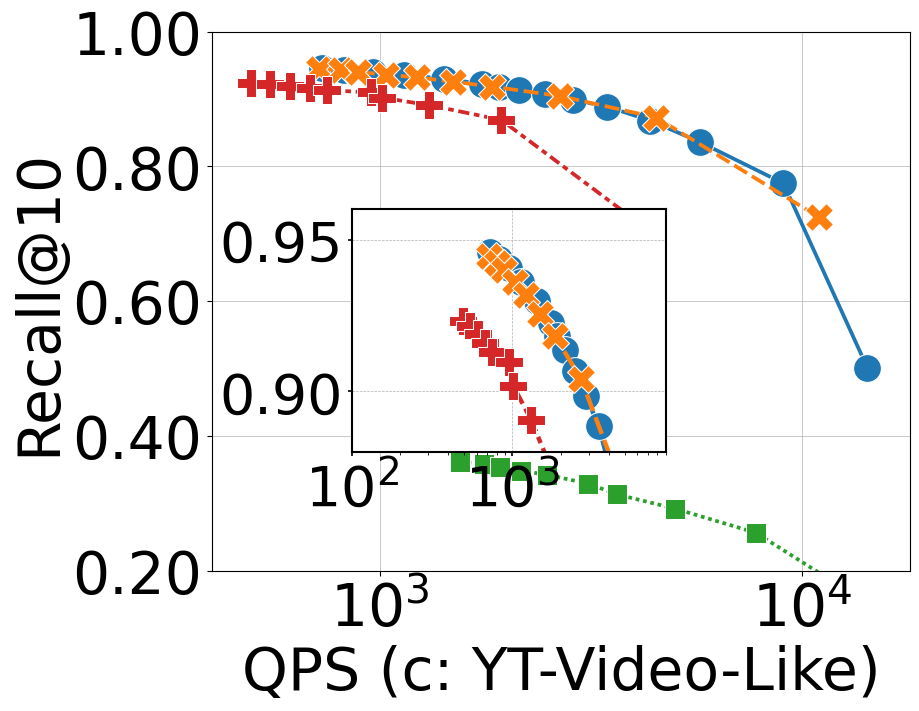

In [27]:
#Dedicated Range search Video Like Plotting Script

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Proposed Query-aware PF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14285.71, 9036.14, 5725.19, 4370.55, 3448.28, 2873.56, 2464.00, 2139.80, 1909.93, 1747.09, 1416.43, 1138.10, 960.30, 821.92, 727.19],
        "Recall": [0.5011, 0.7747, 0.8361, 0.8677, 0.8887, 0.8984, 0.9067, 0.9135, 0.9184, 0.9225, 0.9297, 0.9362, 0.9406, 0.9435, 0.9461]
    },

    "IRange graph ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [10948.9, 4518.07, 2673.8, 1845.02, 1491.05, 1220.5, 1035.2, 888.099, 807.754, 714.967],
        "Recall": [0.7247, 0.8723, 0.9042, 0.9182, 0.9255, 0.9319, 0.9360, 0.9399, 0.9424, 0.9447]
    },

     "SERF ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
       
        "Time": [15000, 7772, 5000, 3649, 3112, 2488, 2164, 1929, 1760, 1548],
        "Recall": [0.1429, 0.2561, 0.2919, 0.3129, 0.3290, 0.3421, 0.3480, 0.3535, 0.3579, 0.3609],
    },
      "ACORN-\u03B3 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4087.19, 1937.98, 1306.62, 1012.15, 951.173, 750.375, 680.581, 610.749, 548.446, 494.56],
        "Recall": [0.7168, 0.8688, 0.8907, 0.9019, 0.9097, 0.9128, 0.9159, 0.9189, 0.9214, 0.9232] 
    },
}
df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(9,7))


LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LEGEND_FONTSIZE = 24
LINE_WIDTH = 2.7
MARKER_SIZE = 20


sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (c: YT-Video-Like)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.2, 1)
ax.set_xlim(400, 1.8e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
# axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

axins = inset_axes(ax, width="45%", height="45%", 
                   bbox_to_anchor=(0.20, 0.22, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)
                   

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.88,0.96)
axins.set_xlim(100, 9e3)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
# 
# plt.savefig("/data3/Adeel/Query-AwareResult/YT-Video-Like-Range.pdf", format="pdf", bbox_inches="tight")
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/DedicatedRangeVideoLike.pdf", format="pdf", bbox_inches="tight")
plt.show()




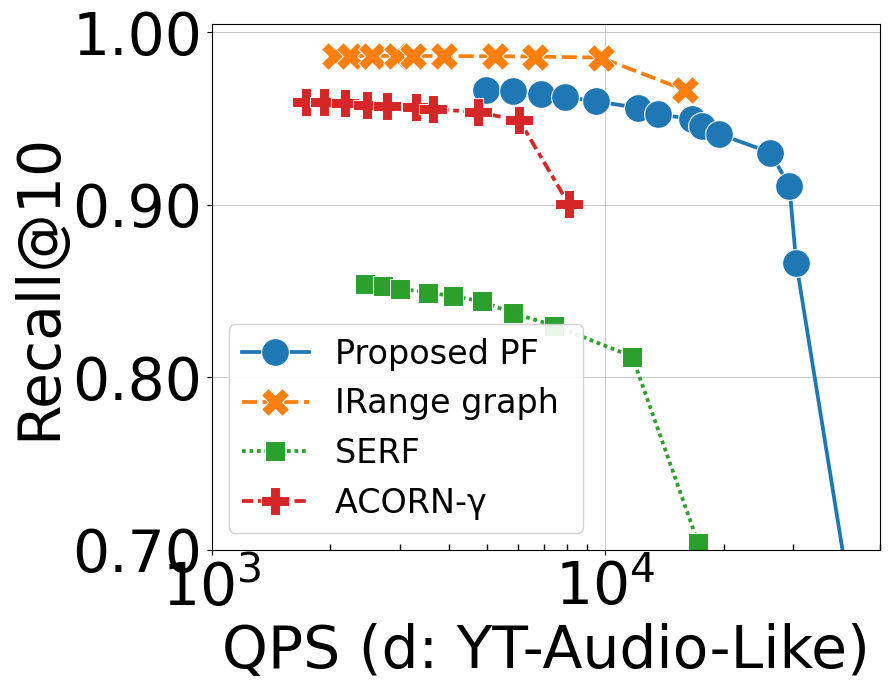

In [28]:
# Dedicated Range search
# Range Search Results
# AUDIO Like

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext

# =========================
# Flatten helper
# =========================
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(
            metrics["Value"], metrics["Time"], metrics["Recall"]
        ):
            rows.append({
                "Category": category,
                "Value": value,
                "Time": time,
                "Recall": recall
            })
    return pd.DataFrame(rows)

# =========================
# Data
# =========================
schemes = {
    "Proposed PF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [45454, 30612, 29412, 26316, 19481, 17647, 16667, 13636, 12097, 12097,
                 9494, 7895, 6881, 5837, 4967],
        "Recall": [0.6233, 0.8663, 0.9107, 0.9302, 0.9410, 0.9457, 0.9495, 0.9526,
                   0.9551, 0.9574, 0.9599, 0.9626, 0.9643, 0.9657, 0.9663]
    },

    "IRange graph ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [15957.4, 9740.26, 6637.17, 5244.76, 3886.01, 3239.74,
                 2952.76, 2551.02, 2238.81, 2051.98],
        "Recall": [0.9665, 0.9853, 0.9859, 0.9861, 0.9862, 0.9863,
                   0.9863, 0.9863, 0.9863, 0.9863]
    },

    "SERF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [17241, 11718, 7425, 5832, 4854, 4098, 3546, 3012, 2727, 2451],
        "Recall": [0.7037, 0.8119, 0.8299, 0.8370, 0.8439, 0.8470,
                   0.8490, 0.8513, 0.8529, 0.8538]
    },

    "ACORN-γ ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [8064.52, 6048.39, 4731.86, 3649.64, 3296.7,
                 2788.1, 2471.17, 2173.91, 1925.55, 1736.11],
        "Recall": [0.9005, 0.9489, 0.9537, 0.9555, 0.9565,
                   0.9573, 0.9581, 0.9588, 0.9594, 0.9595]
    },
}

df = flatten_schemes(schemes)

# =========================
# Plot
# =========================
fig, ax = plt.subplots(figsize=(9,7))


LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LEGEND_FONTSIZE = 24
LINE_WIDTH = 2.7
MARKER_SIZE = 20




sns.lineplot(
    data=df,
    x="Time",
    y="Recall",
    hue="Category",
    style="Category",
    markers=True,
    dashes=True,
    linewidth=LINE_WIDTH,
    markersize=MARKER_SIZE,
    ax=ax,
    legend=True   # no legend
)

ax.set_xscale("log")
ax.set_xlabel("QPS (d: YT-Audio-Like)", fontsize=LABEL_FONTSIZE)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.7, 1.005)
ax.set_xlim(1000, 5e4)

ax.tick_params(axis="both", which="major", labelsize=TICK_FONTSIZE)
ax.tick_params(axis="both", which="minor", length=4, width=1, direction="in")

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))

ax.grid(True, which="major", linestyle="-", linewidth=0.7, alpha=0.7)

# --- Legend ---
ax.legend(
    title_fontsize=16, fontsize=24,
    loc="lower left", frameon=True, fancybox=True, framealpha=0.9
)


plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/DedicatedRangeAudioLike.pdf", format="pdf", bbox_inches="tight")
plt.show()


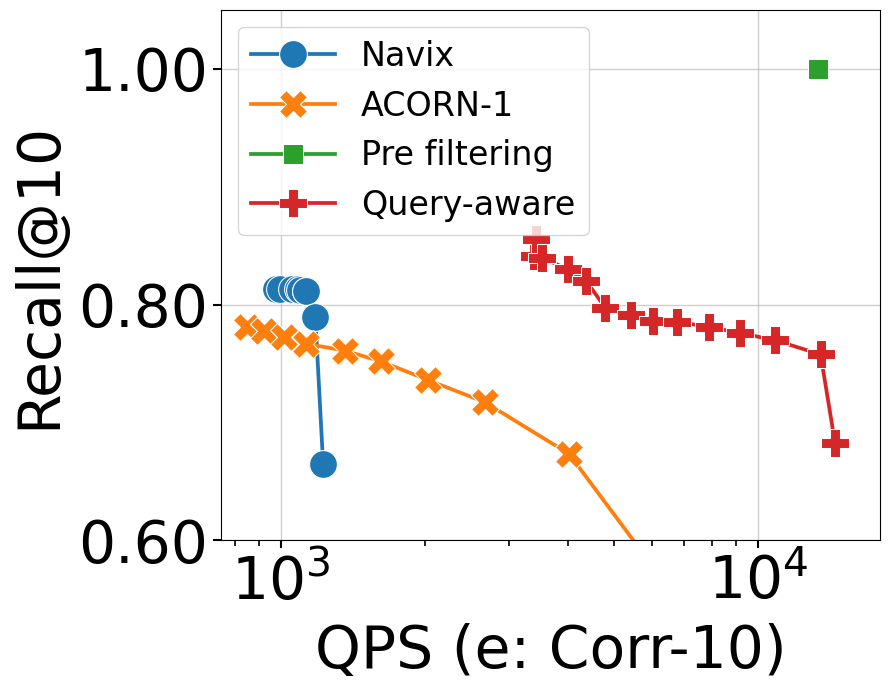

In [29]:
# PAPER Correlation 10 (Improved for consistency with TripClick plots)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext

# --- Data Flattening ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1226.5, 1181.1, 1127.8, 1127.1, 1098.6, 1098.6, 1086.6, 1053.6, 996.7, 977.7],
        "Recall": [0.6646, 0.7895, 0.8115, 0.8115, 0.8125, 0.8125, 0.8135, 0.8135, 0.8136, 0.8136]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [8403.36, 4016.06, 2673.8, 2036.66, 1623.38, 1360.54, 1128.67, 1014.2, 920.81, 848.176],
        "Recall": [0.4989, 0.6735, 0.7174, 0.736, 0.7519, 0.7611, 0.7669, 0.7726, 0.7778, 0.7808]
    },
    "Pre filtering": {
        "Value": [20],
        "Time": [13333.33],
        "Recall": [1]
    },
    "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14492.75, 13513.51, 10869.57, 9174.31, 7874.02, 6756.76, 6024.10, 5405.41, 4784.69, 
                 4784.69, 4366.81, 4000.00, 3521.13, 3389.83, 3424.66],
        "Recall": [0.6826, 0.7578, 0.7698, 0.776, 0.7812, 0.7856, 0.7865, 0.7917, 0.7936, 
                   0.801, 0.82, 0.83, 0.84, 0.841, 0.856]
    }
}

df = flatten_schemes(schemes)

# --- Styling (matching TripClick figure) ---

LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LEGEND_FONTSIZE = 24
LINE_WIDTH = 2.7
MARKER_SIZE = 20

# LABEL_FONTSIZE = 42
# TICK_FONTSIZE = 42
# LINE_WIDTH = 2.7
# MARKER_SIZE = 20
# LABEL_FONTSIZE = 24
# TICK_FONTSIZE = 24
# LEGEND_FONTSIZE = 20
# LINE_WIDTH = 2.8
# MARKER_SIZE = 16

# --- Figure ---
fig, ax = plt.subplots(figsize=(9,7))

# --- Lineplot + Scatter for markers ---
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=LINE_WIDTH, markers=True, markersize=MARKER_SIZE, dashes=False, ax=ax
)

# --- Axes Formatting ---
ax.set_xscale("log")
ax.set_xlabel("QPS (e: Corr-10)", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylim(0.60, 1.05)
ax.set_xlim(750, 1.8e4)
ax.grid(True, which='major', linestyle="-", linewidth=1.0, alpha=0.6)

# --- Ticks ---
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE, width=1.5, length=6)
ax.tick_params(axis='both', which='minor', width=1.2, length=4)
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# --- Legend (same style as upper plot) ---
ax.legend(
    loc="upper left",
    fontsize=LEGEND_FONTSIZE,
    title_fontsize=LEGEND_FONTSIZE + 1,
    frameon=True,
    handlelength=2.5,
    handletextpad=0.8
)

# --- Save or show ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/Correlation10.pdf", format="pdf", bbox_inches="tight", dpi=600)
plt.show()


/tmp/ipykernel_7213/2851904981.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


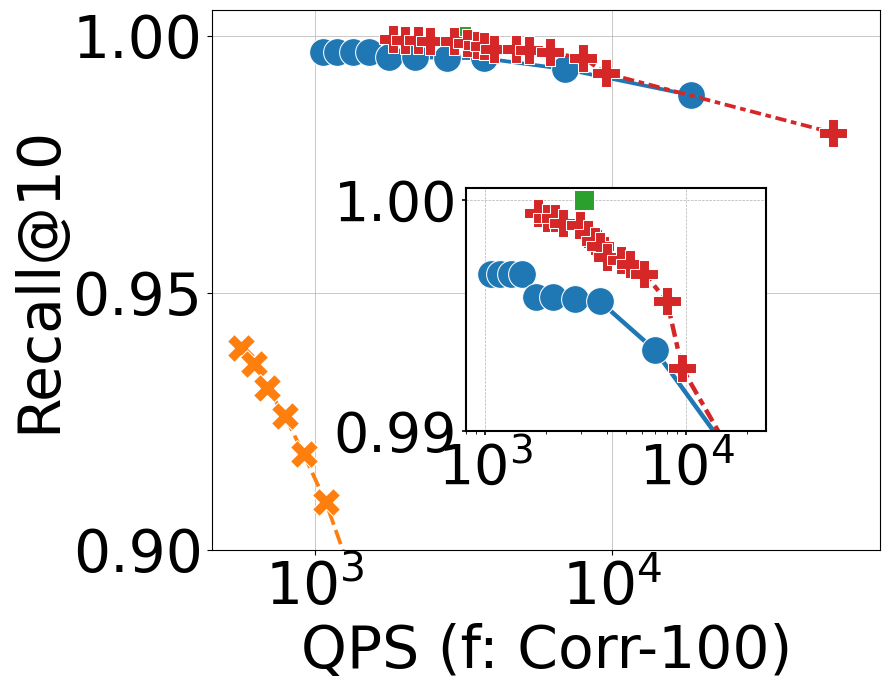

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Flatten Data ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category.strip(), "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [18518.5, 6944.44, 3703.7, 2785.52, 2164.5, 1779.36, 1512.86, 1336.9, 1182.03, 1064.96],
        "Recall": [0.9884, 0.9935, 0.9956, 0.9957, 0.9958, 0.9958, 0.9968, 0.9968, 0.9968, 0.9968]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [4184.1, 2450.98, 1808.32, 1335.11, 1085.78, 915.751, 790.514, 688.705, 622.665, 563.698],
        "Recall": [0.5931, 0.8197, 0.8718, 0.8946, 0.9092, 0.9185, 0.926, 0.9315, 0.9362, 0.9393]
    },
    "Pre filtering": {
        "Value": [20],
        "Time": [3105.59],
        "Recall": [1]
    },
    "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [55555.6, 9523.81, 8000.0, 6172.84, 5235.60, 4739.34, 4016.06, 3703.70, 3521.13,
                 3246.75, 2941.18, 2439.02, 2217.29, 2012.08, 1834.86],
        "Recall": [0.9811, 0.9927, 0.9956, 0.9968, 0.9972, 0.9974, 0.9975, 0.9980, 0.9982,
                   0.9985, 0.9989, 0.9990, 0.9992, 0.9992, 0.9994]
    }
}

df = flatten_schemes(schemes)

# --- Create Figure & Axes ---
fig, ax = plt.subplots(figsize=(9, 7))

# --- Set preferred font sizes ---
LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LEGEND_FONTSIZE = 24
LINE_WIDTH = 2.7
MARKER_SIZE = 20

# --- Main line plot ---
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False
)
# Ensure no legend
if ax.get_legend() is not None:
    ax.get_legend().remove()

ax.set_xscale("log")
ax.set_xlabel("QPS (f: Corr-100)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.90, 1.005)
ax.set_xlim(450, 8e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="45%", height="45%", 
                   bbox_to_anchor=(0.38, 0.22, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)
# Ensure inset has no legend
if axins.get_legend() is not None:
    axins.get_legend().remove()

axins.set_xscale("log")
axins.set_ylim(0.99, 1.0005)
axins.set_xlim(800, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)

axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

axins.set_xlabel('') 
axins.set_ylabel('')

for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/Corelation100.pdf", format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_7213/30792930.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


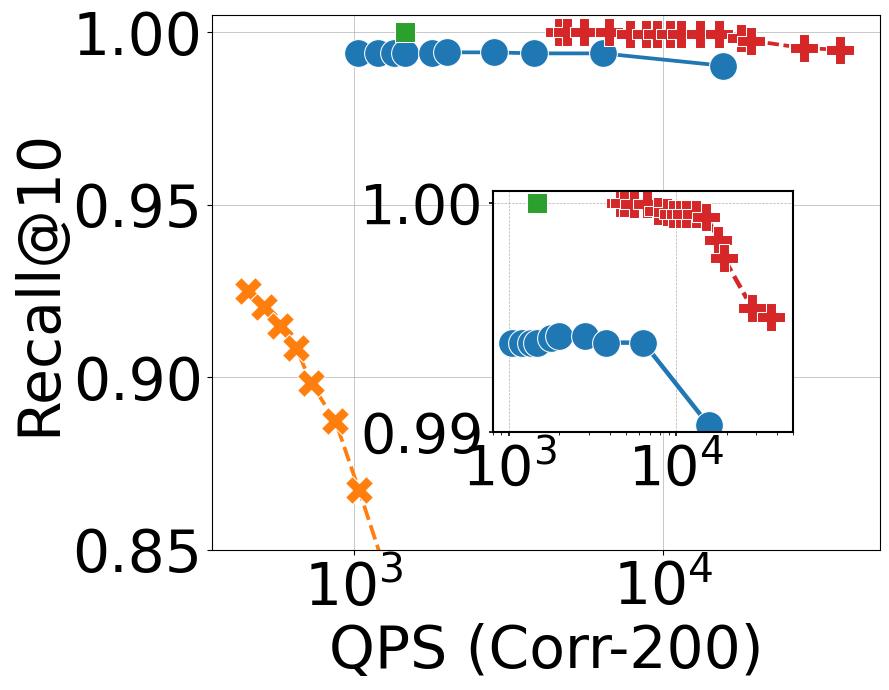

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Flatten Data ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category.strip(), "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [15625, 6369.43, 3816.79, 2849, 2000, 1785.71, 1468.43, 1351.35, 1197.6, 1036.27],
        "Recall": [0.9903, 0.9939, 0.9939, 0.9942, 0.9942, 0.9941, 0.9939, 0.9939, 0.9939, 0.9939]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [4310.34, 1766.78, 1430.62, 1041.67, 874.126, 729.927, 652.742, 578.369, 512.295, 456.621],
        "Recall": [0.5043, 0.7517, 0.8294, 0.8672, 0.8872, 0.8982, 0.9085, 0.9149, 0.9204, 0.9251]
    },
    "Pre filtering": {
        "Value": [20],
        "Time": [1468.4],
        "Recall": [1]
    },
    "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [37037.04, 28474.58, 19230.77, 17857.14, 15151.52, 13157.89, 11363.64, 10526.32, 9523.81,
                 8771.93, 7812.5, 6666.67, 5555.56, 4901.96, 4587.16],
        "Recall": [0.9950, 0.9954, 0.9976, 0.9984, 0.9994, 0.9995, 0.9995, 0.9995, 0.9995,
                   0.9996, 0.99964, 0.99996, 0.99997, 0.99998, 0.99998]
    }
}

df = flatten_schemes(schemes)

# --- Create Figure & Axes ---
fig, ax = plt.subplots(figsize=(9, 7))

# --- Set preferred font sizes ---
LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LEGEND_FONTSIZE = 24
LINE_WIDTH = 2.7
MARKER_SIZE = 20

# --- Main line plot ---
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False
)
# Ensure no legend
if ax.get_legend() is not None:
    ax.get_legend().remove()

ax.set_xscale("log")
ax.set_xlabel("QPS (Corr-200)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.85, 1.005)
ax.set_xlim(350, 5e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="45%", height="45%", 
                   bbox_to_anchor=(0.42, 0.22, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)
# Ensure inset has no legend
if axins.get_legend() is not None:
    axins.get_legend().remove()

axins.set_xscale("log")
axins.set_ylim(0.99, 1.0005)
axins.set_xlim(800,5e4)
axins.grid(True, linestyle="--", linewidth=0.5)

axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

axins.set_xlabel('') 
axins.set_ylabel('')

for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/Corelation200.pdf", format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_7213/1529622539.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


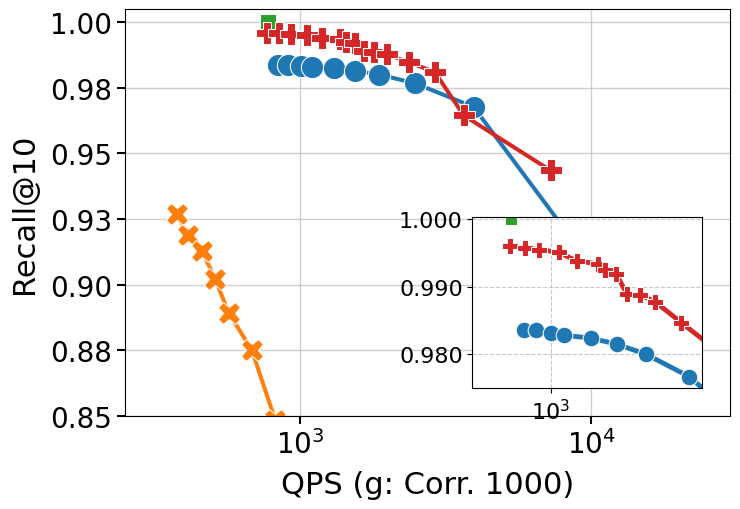

In [32]:
# PAPER Correlation 1000 — No Legend + No Minor Ticks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Flatten helper ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for v, t, r in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category.strip(), "Value": v, "Time": t, "Recall": r})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [10638.3, 3937.01, 2475.25, 1869.16, 1540.83, 1300.39, 1095.29, 1003.01, 908.265, 838.926],
        "Recall": [0.9034, 0.9677, 0.9767, 0.98, 0.9815, 0.9824, 0.9828, 0.9831, 0.9836, 0.9836]
    },
   "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [3484.32, 1686.34, 1102.54, 818.331, 679.81, 565.611, 509.424, 458.505, 410.172, 377.358],
        "Recall": [0.485, 0.7393, 0.8098, 0.8484, 0.8751, 0.8893, 0.902, 0.9128, 0.9187, 0.9268]
    },
    "Pre filtering": {
        "Value": [20],
        "Time": [771.8],
        "Recall": [1]
    },
   "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [7241.38, 3636.36, 2898.55, 2352.94, 1980.20, 1795.70, 1650.17, 1536.10, 1432.66,
                 1362.97, 1189.78, 1053.74, 925.93, 844.59, 768.64],
        "Recall": [0.9435, 0.9645, 0.981, 0.9847, 0.9878, 0.9888, 0.9889, 0.9919, 0.9925, 0.9934,
                   0.9938, 0.9951, 0.9955, 0.9957, 0.9960]
    }
}
df = flatten_schemes(schemes)

# --- Styling ---
LABEL_FONTSIZE = 22
TICK_FONTSIZE = 20
LINE_WIDTH = 2.9
MARKER_SIZE = 16
palette = sns.color_palette("tab10", n_colors=4)

# --- Main Plot ---
fig, ax = plt.subplots(figsize=(7.5, 5.2))

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=LINE_WIDTH, markers=True, markersize=MARKER_SIZE,
    dashes=False, ax=ax, palette=palette, legend=False
)

ax.set_xscale("log")
ax.set_xlabel("QPS (g: Corr. 1000)", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylim(0.85, 1.005)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=1.0, alpha=0.6)
ax.tick_params(axis='both', labelsize=TICK_FONTSIZE, width=1.5, length=6)
ax.minorticks_off()  # 🔹 disable minor ticks
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# --- Inset ---
axins = inset_axes(ax, width="38%", height="42%", loc='lower right', borderpad=2)
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=3.5, markers=True, markersize=12, dashes=False,
    ax=axins, legend=False, palette=palette
)

axins.set_xscale("log")
axins.set_ylim(0.975, 1.0003)
axins.set_xlim(600, 2.7e3)
axins.grid(True, linestyle="--", linewidth=0.8, alpha=0.7)
axins.tick_params(labelsize=16)
axins.minorticks_off()  # 🔹 disable minor ticks
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.3f}'))
axins.set_xlabel('')
axins.set_ylabel('')

# --- Save or Show ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/Corelation1000.pdf",
            format="pdf", bbox_inches="tight", dpi=600)
plt.show()


/tmp/ipykernel_39536/1400996227.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


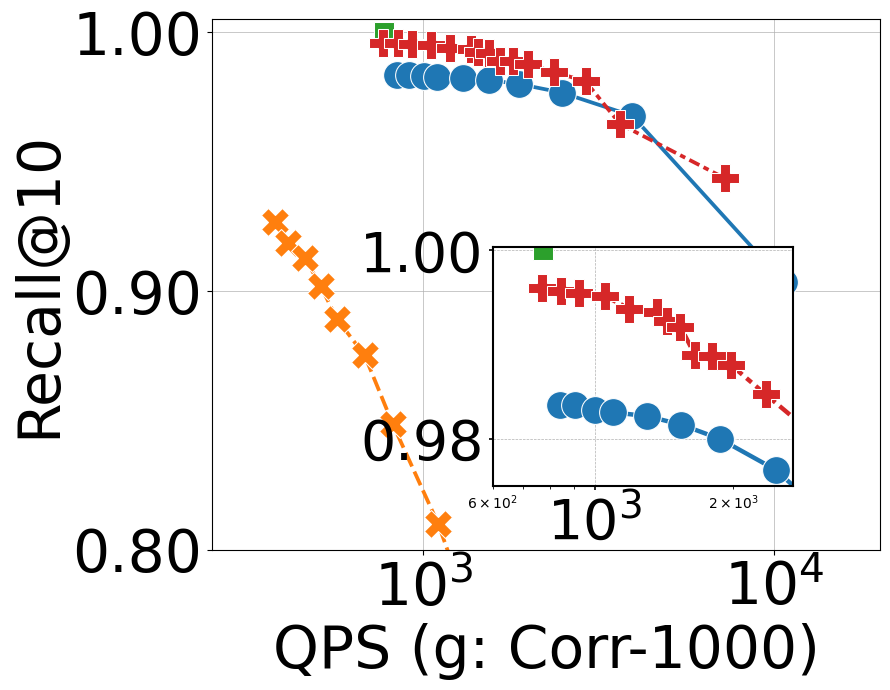

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Flatten Data ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category.strip(), "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [10638.3, 3937.01, 2475.25, 1869.16, 1540.83, 1300.39, 1095.29, 1003.01, 908.265, 838.926],
        "Recall": [0.9034, 0.9677, 0.9767, 0.98, 0.9815, 0.9824, 0.9828, 0.9831, 0.9836, 0.9836]
    },
   "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [3484.32, 1686.34, 1102.54, 818.331, 679.81, 565.611, 509.424, 458.505, 410.172, 377.358],
        "Recall": [0.485, 0.7393, 0.8098, 0.8484, 0.8751, 0.8893, 0.902, 0.9128, 0.9187, 0.9268]
    },
    "Pre filtering": {
        "Value": [20],
        "Time": [771.8],
        "Recall": [1]
    },
   "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [7241.38, 3636.36, 2898.55, 2352.94, 1980.20, 1795.70, 1650.17, 1536.10, 1432.66,
                 1362.97, 1189.78, 1053.74, 925.93, 844.59, 768.64],
        "Recall": [0.9435, 0.9645, 0.981, 0.9847, 0.9878, 0.9888, 0.9889, 0.9919, 0.9925, 0.9934,
                   0.9938, 0.9951, 0.9955, 0.9957, 0.9960]
    }
}

df = flatten_schemes(schemes)

# --- Create Figure & Axes ---
fig, ax = plt.subplots(figsize=(9, 7))

# --- Set preferred font sizes ---
LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LEGEND_FONTSIZE = 24
LINE_WIDTH = 2.7
MARKER_SIZE = 20

# --- Main line plot ---
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False
)
# Ensure no legend
if ax.get_legend() is not None:
    ax.get_legend().remove()

ax.set_xscale("log")
ax.set_xlabel("QPS (g: Corr-1000)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.80, 1.005)
ax.set_xlim(250, 20e3)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="45%", height="45%", 
                   bbox_to_anchor=(0.42, 0.12, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)
# Ensure inset has no legend
if axins.get_legend() is not None:
    axins.get_legend().remove()

axins.set_xscale("log")
axins.set_ylim(0.975, 1.0003)
axins.set_xlim(600, 2.7e3)
axins.grid(True, linestyle="--", linewidth=0.5)

axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

axins.set_xlabel('') 
axins.set_ylabel('')

for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/Corelation1000.pdf", format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_39536/2470138649.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


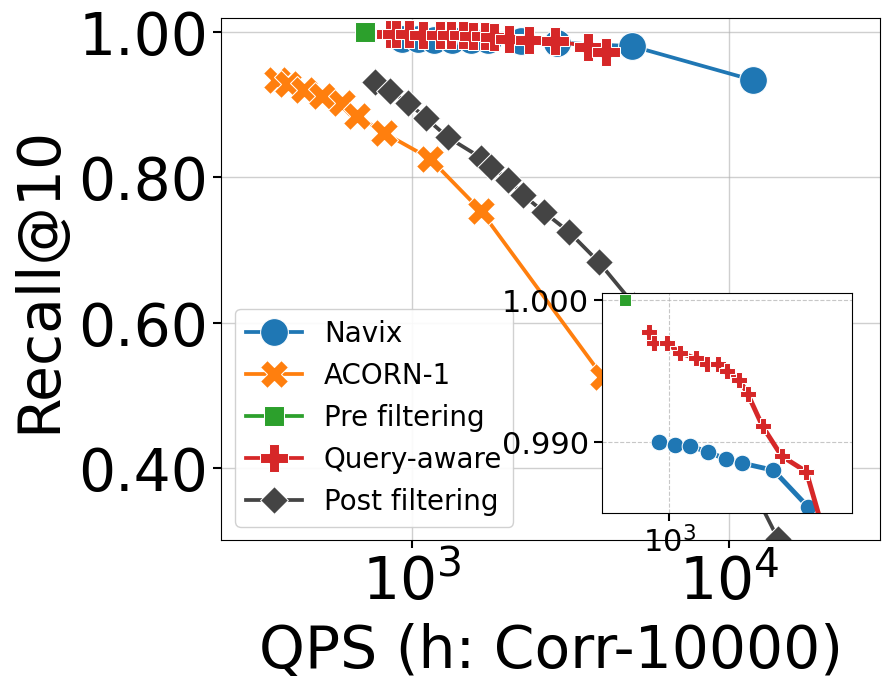

In [3]:
# PAPER Correlation 10000 — With Legend, No Minor Ticks, Custom Post-filtering Color
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Flatten helper ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for v, t, r in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category.strip(), "Value": v, "Time": t, "Recall": r})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [11904.8, 4950.5, 2865.33, 2202.64, 1736.11, 1531.39, 1338.69, 1170.96, 1044.93, 927.644],
        "Recall": [0.9339, 0.9806, 0.9854, 0.988, 0.9885, 0.9888, 0.9893, 0.9897, 0.9898, 0.99]
    },
   "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [4000, 1650.17, 1140.25, 816.327, 669.792, 602.41, 519.211, 456.621, 404.858, 375.375],
        "Recall": [0.5253, 0.7539, 0.8258, 0.8612, 0.8851, 0.9022, 0.9115, 0.9207, 0.9278, 0.9339]
    },
   "Pre filtering": {
        "Value": [20],
        "Time": [713.06],
        "Recall": [1]
    },
   "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [4084.5, 3597.12, 2824.86, 2342.63, 2028.40, 1811.59, 1700.68, 1552.80, 1449.28, 1329.79,
                 1223.78, 1083.67, 980.39, 888.87, 854.70],
        "Recall": [0.9728, 0.9801, 0.9879, 0.989, 0.9911, 0.9934, 0.9944, 0.995, 0.9955, 0.9955,
                   0.9959, 0.9963, 0.997, 0.997, 0.9978]
    },
   "Post filtering": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14285.7, 7936.51, 5025.13, 3891.06, 3125.00, 2604.17, 2247.19, 2016.13, 1782.53, 1650.17,
                 1297.92, 1103.75, 970.87, 851.71, 763.36],
        "Recall": [0.3026, 0.5226, 0.6244, 0.6832, 0.7251, 0.7525, 0.7754, 0.7966, 0.8137, 0.8271,
                   0.8551, 0.8819, 0.9029, 0.9192, 0.9318]
    }
}

df = flatten_schemes(schemes)

# --- Style params ---
LABEL_FONTSIZE = 42
TICK_FONTSIZE = 42
LEGEND_FONTSIZE = 24
LINE_WIDTH = 2.7
MARKER_SIZE = 20

# --- Custom palette (Post filtering in dark gray) ---
base_palette = sns.color_palette("tab10", n_colors=5)
custom_palette = {
    "Navix": base_palette[0],
    "ACORN-1": base_palette[1],
    "Pre filtering": base_palette[2],
    "Query-aware": base_palette[3],
    "Post filtering": "#444444"  # 🔹 dark gray for contrast
}

# --- Main Plot ---
fig, ax = plt.subplots(figsize=(9, 7))
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=LINE_WIDTH, markers=True, markersize=MARKER_SIZE,
    dashes=False, ax=ax, palette=custom_palette
)

ax.set_xscale("log")
ax.set_xlabel("QPS (h: Corr-10000)", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylim(0.30, 1.019)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=1.0, alpha=0.6)
ax.tick_params(axis='both', labelsize=TICK_FONTSIZE, width=1.5, length=6)
ax.minorticks_off()  # 🔹 disable minor ticks
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# --- Legend ---
ax.legend(
    title_fontsize=16, fontsize=20,
    loc="lower left", frameon=True, fancybox=True, framealpha=0.9
)

# --- Inset (zoomed region) ---
axins = inset_axes(ax, width="38%", height="42%", loc='lower right', borderpad=2)
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=3.5, markers=True, markersize=12, dashes=False,
    ax=axins, legend=False, palette=custom_palette
)

axins.set_xscale("log")
axins.set_ylim(0.985, 1.0005)
axins.set_xlim(600, 4e3)
axins.grid(True, linestyle="--", linewidth=0.8, alpha=0.7)
#axins.tick_params(labelsize=22)
axins.tick_params(
    axis='both',
    labelsize=22,
    width=1.5,
    length=6
)
axins.minorticks_off()  # 🔹 disable minor ticks
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.3f}'))
axins.set_xlabel('')
axins.set_ylabel('')

# --- Save or Show ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Updated_Corr_Dedicated/Corelation10000.pdf",
            format="pdf", bbox_inches="tight", dpi=600)
plt.show()
